# Oasis Infobyte Task 3

## CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
data.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
data.shape

(301, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Visualize the distribution of the target variable

In [ ]:
import matplotlib.pyplot as plt

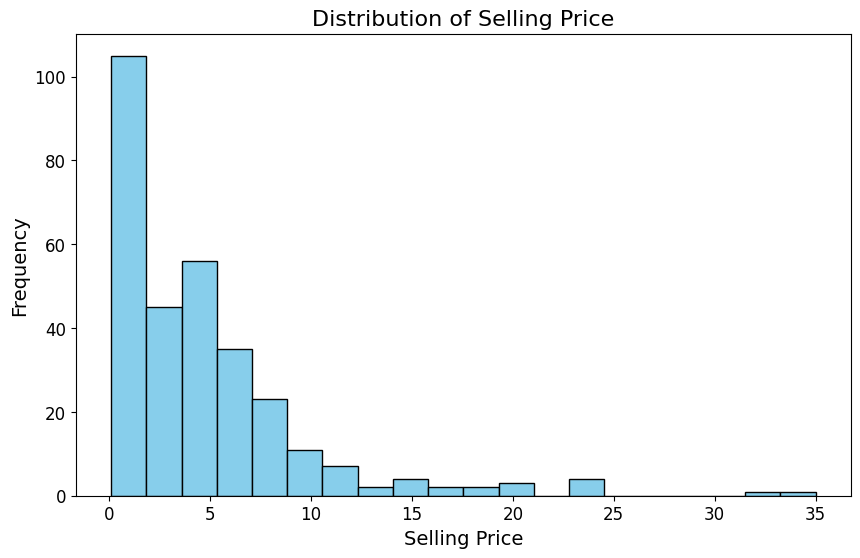

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Selling_Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Selling Price', fontsize=16)
plt.xlabel('Selling Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

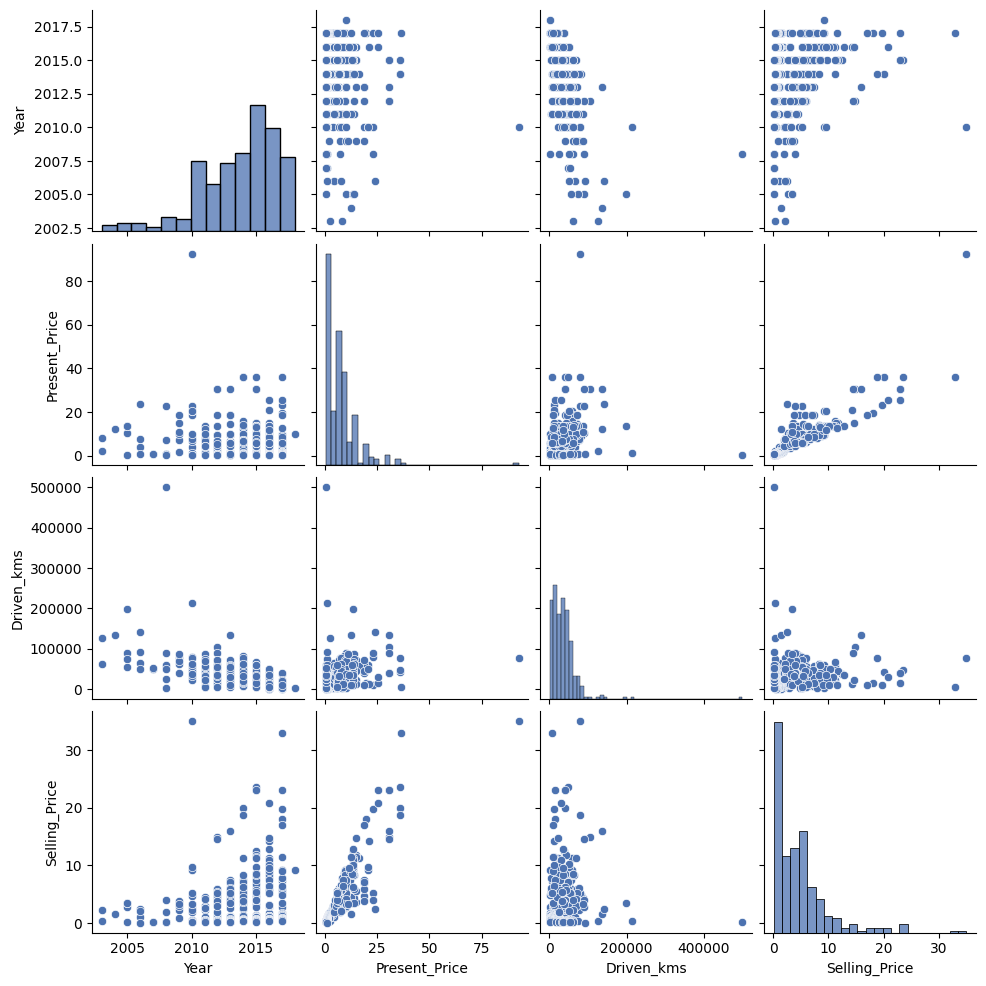

In [ ]:
sns.set_palette("deep")
sns.pairplot(data, vars=['Year', 'Present_Price', 'Driven_kms', 'Selling_Price'])
plt.show()

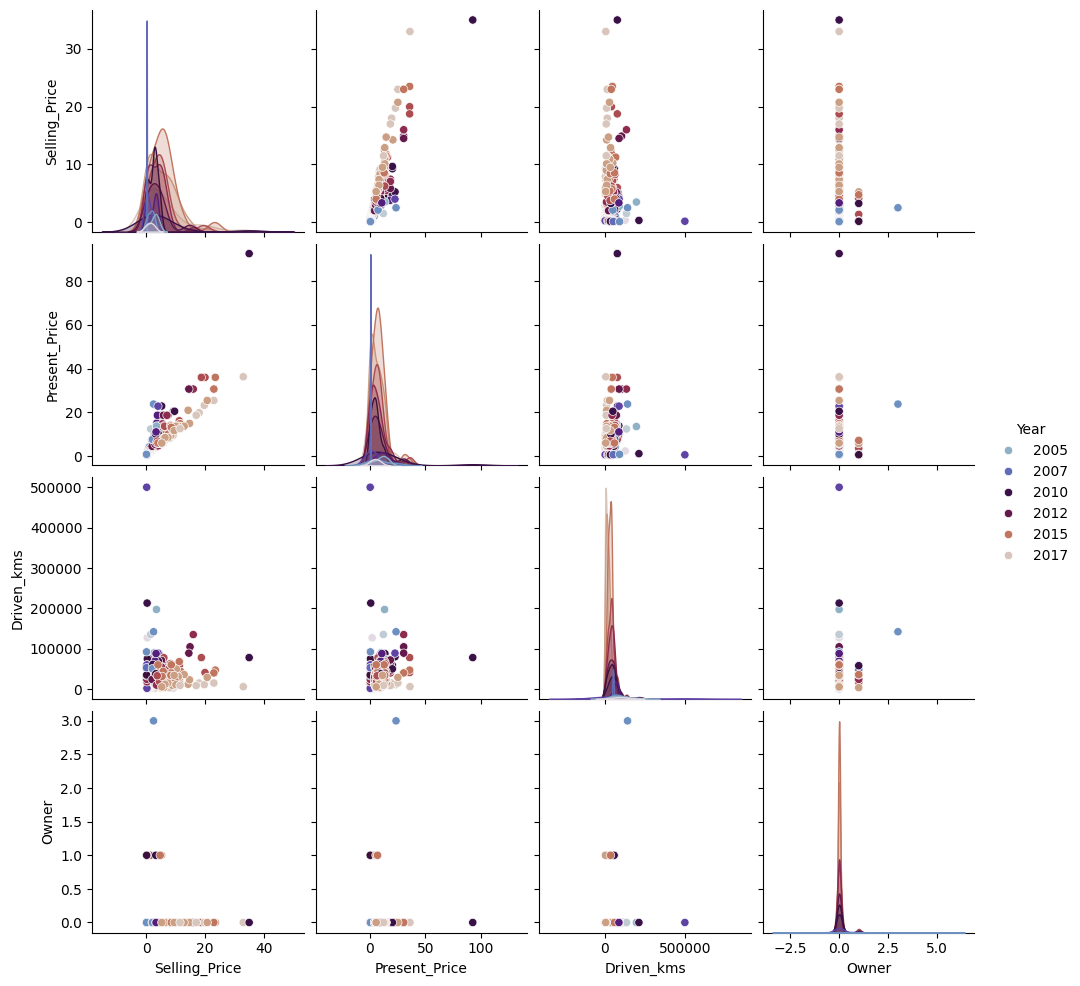

In [ ]:
sns.pairplot(data,hue='Year',palette='twilight')

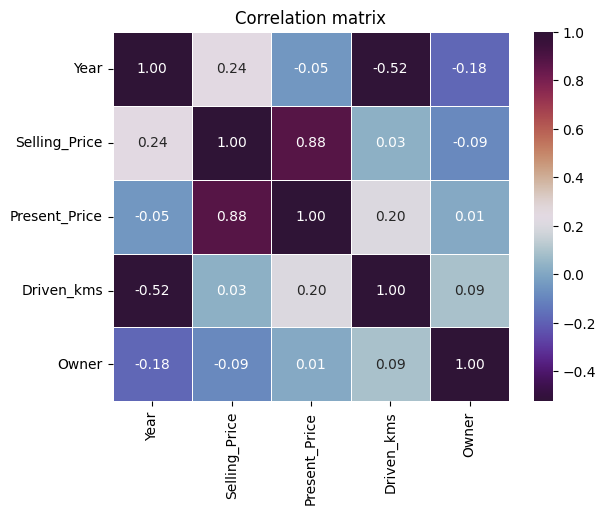

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='twilight_shifted', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

<ipython-input-13-f1d48055039a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data, palette=palette)


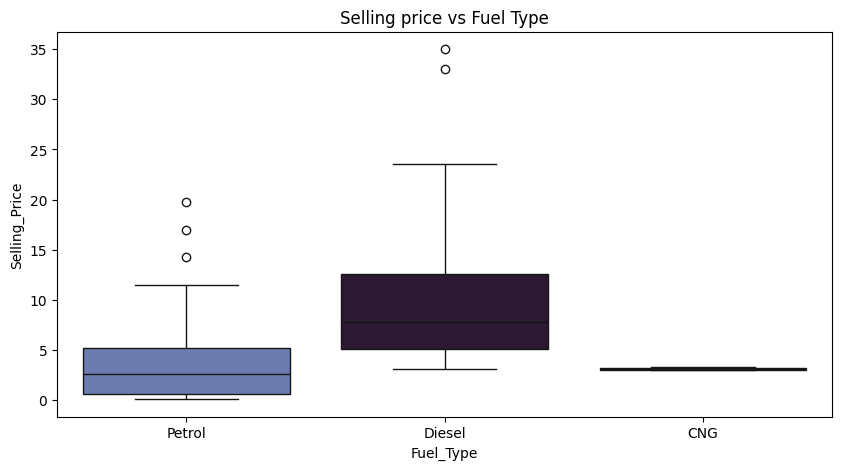

In [ ]:
palette = "twilight"
plt.figure(figsize=(10, 5))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=data, palette=palette)
plt.title('Selling price vs Fuel Type')
plt.show()

<ipython-input-14-21174a87760d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Selling_type',data=data,palette='twilight')


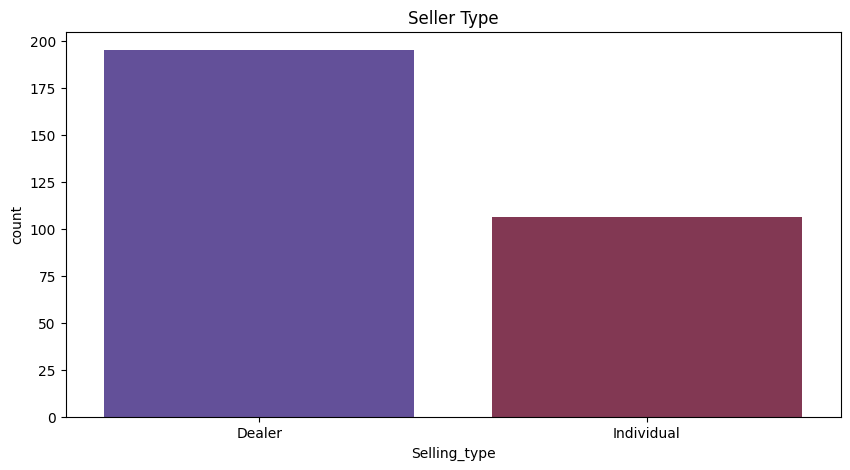

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Selling_type',data=data,palette='twilight')
plt.title('Seller Type')
plt.show()

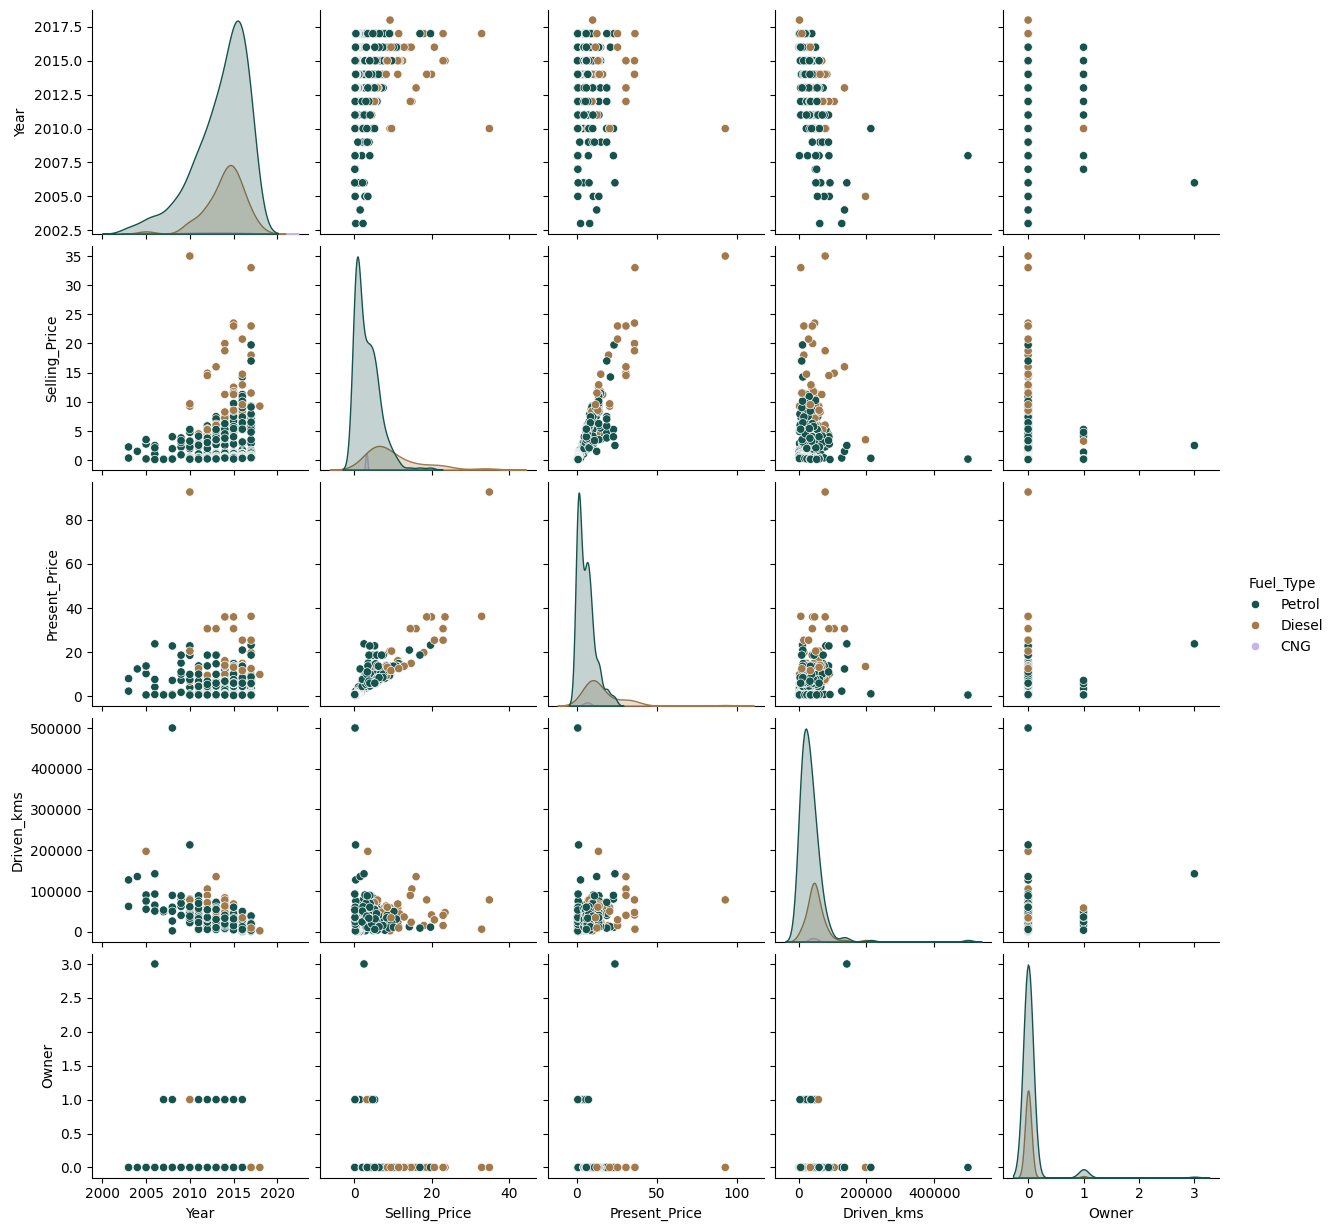

In [ ]:
sns.pairplot(data,hue='Fuel_Type',palette='cubehelix')

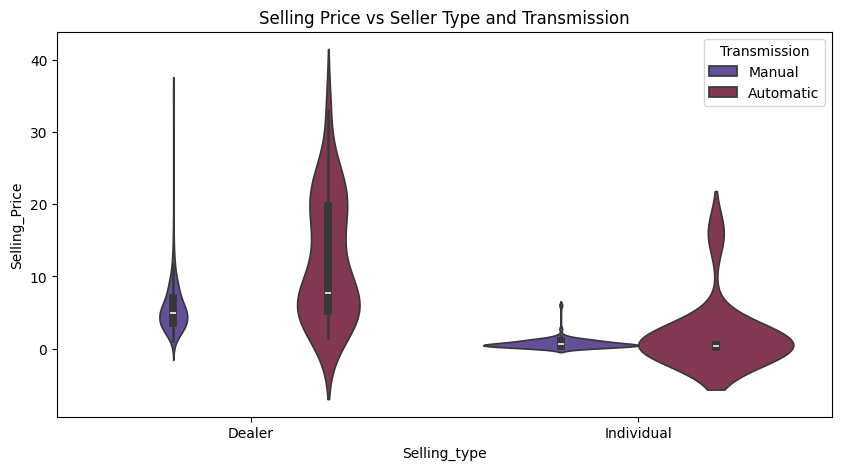

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Selling_type',y='Selling_Price',hue='Transmission',data=data,palette='twilight')
plt.title('Selling Price vs Seller Type and Transmission')
plt.show()

In [ ]:
# Perform one-hot encoding on the categorical columns
x = pd.get_dummies(data.drop(['Car_Name', 'Selling_Price'], axis=1))
y = data['Selling_Price']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Define and train your model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(x_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 3.4813498305139885
R-squared Score: 0.8488707839192211


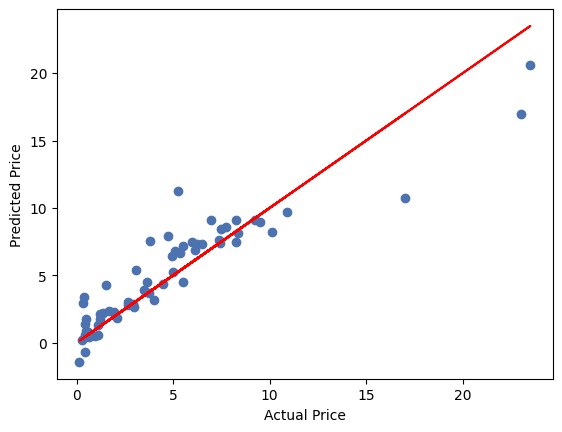

In [ ]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()